# Introduction to Dataset
In this assignment I am going to look at the [mpg dataset](https://ggplot2.tidyverse.org/reference/mpg.html) which contains a subset of fuel economy data that is published by the Environmental Protection Agency (EPA) (data is [available here](https://fueleconomy.gov/)). The dataset contains data of newly released car models from 1999 - 2008. 

## Graphs used
In this assignment I will be using these graphs to visualise the car fuel economy data:
*   Boxplot
*   Scatter plot (with line of best fit)

## Types of Data

When deciding which graphs to use to represent the data I had to identify the data types. Therefore, I have decided to give a explaination of the different data types:

* <u>Categorical/Qualitative Data</u>
  * **Nominal Data**: Data that can be stored into groups or categories through labels that has no particular order (ex. hair color)
      * Graphs: Pie Charts, Bar Charts 
  * **Ordinal Data**: Data that can be stored into groups or categories that has have a particular order (ex. level of education)
      * Graphs: Bar Charts 
* <u>Numerical/Quantitative</u>
   * **Discrete Data**: Data that can be counted and usually comes as whole numbers or integers
       * Graphs: Bar Chart, Stacked Bar Chart, Histogram, Spider Chart
   * **Continuous Data**:Data that can be measured and can take a range of unlimited values
       * Graphs: Bar Charts, Line Graphs, Scatter Plots, Box Plots 

In [2]:
library(tidyverse) #loading the tidyverse library (used for data wrangling, tidying, reading/writing, parsing, and visualizing)

In [10]:
head(mpg,5) #loading the dataset and printing the first 5 rows

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


# Question 1

Investigate the relationship between the number of cylinders (`cyl`) and highway fuel efficiency (`hwy`). Look at the variables, and decide which type of plot (scatterplot, line plot, boxplot, or bar chart) best summarizes their relationship. Comment on that relationship.s. 

## Investigating the Variables

I am using the `unique()` function on the `cyl` and `hwy` columns to get a better understanding of the data. The number of columns (`cyl`) is a **discrete variable**. A cylinder cannot be a fraction, must represent a whole number, and can be counted. The `hwy` variable is a **continuous variable** since highway fuel efficiency can take on any range of values. 

A boxplot would be the best graph to display the relationship between the number of cylinders(cyl) and highway fuel efficiency(hwy). The reason for this is because cyl is a discrete x-variable that can represent different types of cylinders while hwy is a continuous y-variable. 

In [41]:
print('The number of unique values of the cyl or number of cylinders column')
print(unique(mpg$cyl))
print('-----------------------')
print('The number of unique values of the hwy or highway fuel efficiency column')
print(unique(mpg$hwy))

print(typeof(mpg$cyl))
print(is.factor(mpg$cyl))
print(typeof(mpg$hwy))
print(is.factor(mpg$hwy))

[1] "The number of unique values of the cyl or number of cylinders column"
[1] 4 6 8 5
[1] "-----------------------"
[1] "The number of unique values of the hwy or highway fuel efficiency column"
 [1] 29 31 30 26 27 25 28 24 23 20 15 17 19 14 22 21 18 12 16 33 32 34 36 35 37
[26] 44 41
[1] "integer"
[1] FALSE
[1] "integer"
[1] FALSE


## Investigating the relationship between cyl and hwy

From looking at the graph you can observe that cars with less cylinders have higher fuel efficiency since the median for the boxplot with 4 and 5 cylinders is approximately 28 miles per gallon. This result is way larger that the median milage shown for cars with 6 and 8 cylinders which is approximately 23 and 17 respectively. 

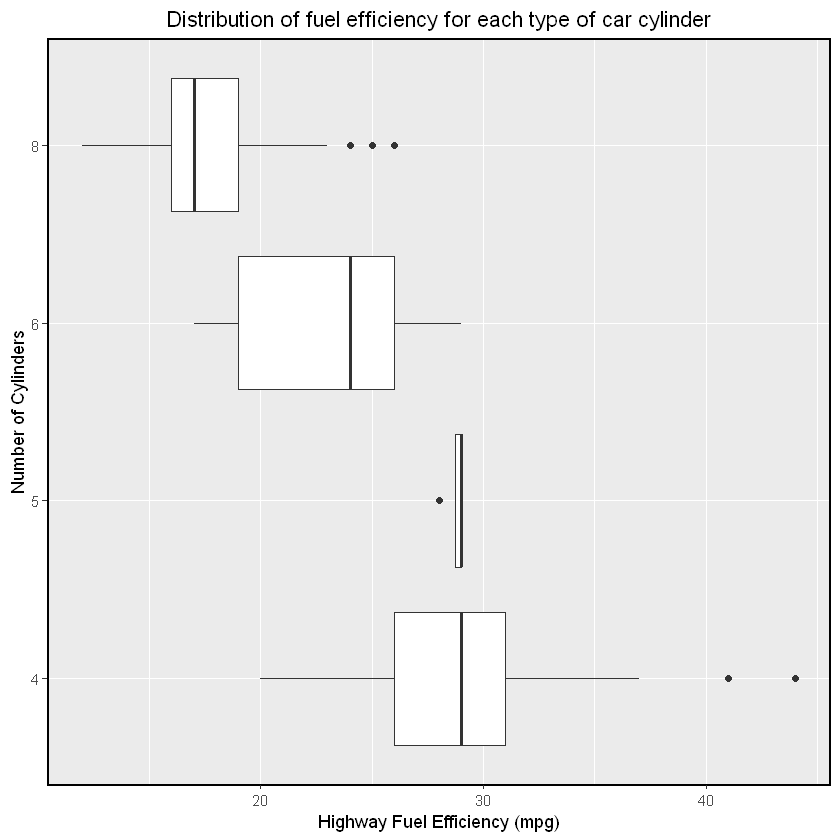

In [65]:
ggplot(data=mpg)+
  geom_boxplot(mapping=aes(x=as.factor(cyl),y=hwy))+ #as.factor() converts the numeric variables in the cyl column to a factor. Doing this puts the cylinders into groups
  coord_flip()+
  labs(x= "Number of Cylinders", y = "Highway Fuel Efficiency (mpg)")+
  ggtitle("Distribution of fuel efficiency for each type of car cylinder")+
  theme(plot.title = element_text(hjust = 0.5), #putting the ggplot title in the center
       panel.border = element_rect(color = "black", fill = NA, size = 1)) #creating the graph border

# Question 2
Investigate the relationship between city and highway fuel efficiency. What substantive conclusions can you draw about the relationship between these variables?
de.


## Investigating the relationship between city and highway miles per gallon

The scatter plot below shows that highways have 5-10 mpgs as compared to cities. The difference between the regression line and perfect line of best fit (the line with a y-interept of 0 and slope of 1) show that cars driven in the highway cover more mileage than cars driven in the city. In other words, cars driven in the highway are more fuel efficient. Cars driven on the highway have to cover a lot of milage and are probably delivery trucks, travellers, etc which is why their engines cover more miles per gallon as compared to city travellers.

I reached this conclusion by using the `geom_abline()` function and setting the y-intercept to 0 and the line slope by 1. I created the straight geom_abline() line to represent a perfect relationship between the two variables. By having an idea of what the perfect relationship between the two variables would look like I then decided to graph the regression line. To graph the regression line I used `geom_smooth(method = 'loess')` (specifically, I am graphing the local regression). There are different methods to call to graph the regressions. The different types of methods are: `"lm", "glm", "gam", "loess"`

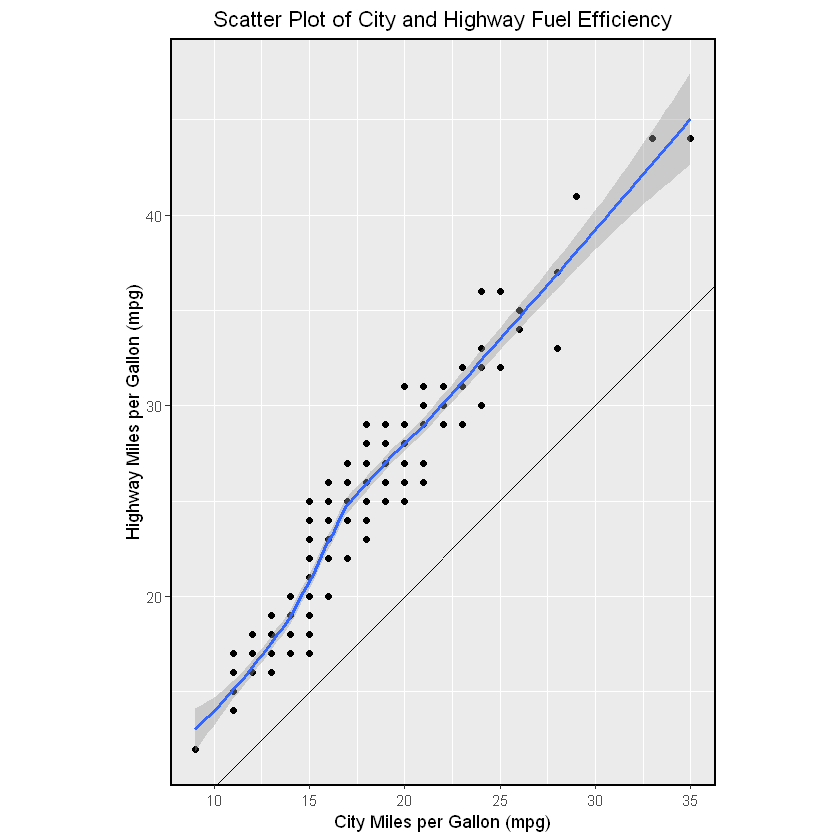

In [67]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
  geom_point() + # Graphing the data points of cty and hwy to display the relationship
  geom_abline(intercept = 0, slope = 1) + # I am creating the straight line that represents the perfect relationship between the cty and hwy variables
  coord_fixed() + # fixes the ratio of the x and y axis length
  geom_smooth(method = 'loess') + # graphing the regression line (specifically the local regression) | lm stands for "linear model"
  labs(x= "City Miles per Gallon (mpg)", y = "Highway Miles per Gallon (mpg)")+
  ggtitle("Scatter Plot of City and Highway Fuel Efficiency")+
  theme(plot.title = element_text(hjust = 0.5), #putting the ggplot title in the center
       panel.border = element_rect(color = "black", fill = NA, size = 1)) #creating the graph border

# Question 3
Look at how the type of drivetrain influences fuel economy (drv). For a given engine size (displ), in general, do four-wheel drive, front wheel drive, or rear wheel drive engines have the highest fuel economy? 

## Relationship between Engine Displacement, Highway Miles per Gallon, and Car Drive Train

Front wheel drives have the highest fuel economy since the scatterplot shows that majority of the front wheel drivetrains can cover more highway miles per gallon (green points in graph). Also, the front wheel drivetrains have a small engine displacement which means their size is small which reveals that cars with a small engine size have greater fuel efficiency. 

There are some four-wheel drivetrains (red points in graph) that do mix with the green points, but majority of the red points are in the lower right-hand corner of the graph. This means that there are some four-wheel drivetrains that have a high fuel economy, but majority of the four-wheel drivetrains do not have a high fuel economy.In conclusion, the cars with big engine sizes (engine displacement is large) can produce more power but they do not have a high highway mpg rate, which means that big engine cars have a low fuel economy as compared to cars with sa=mall engine sizes. 


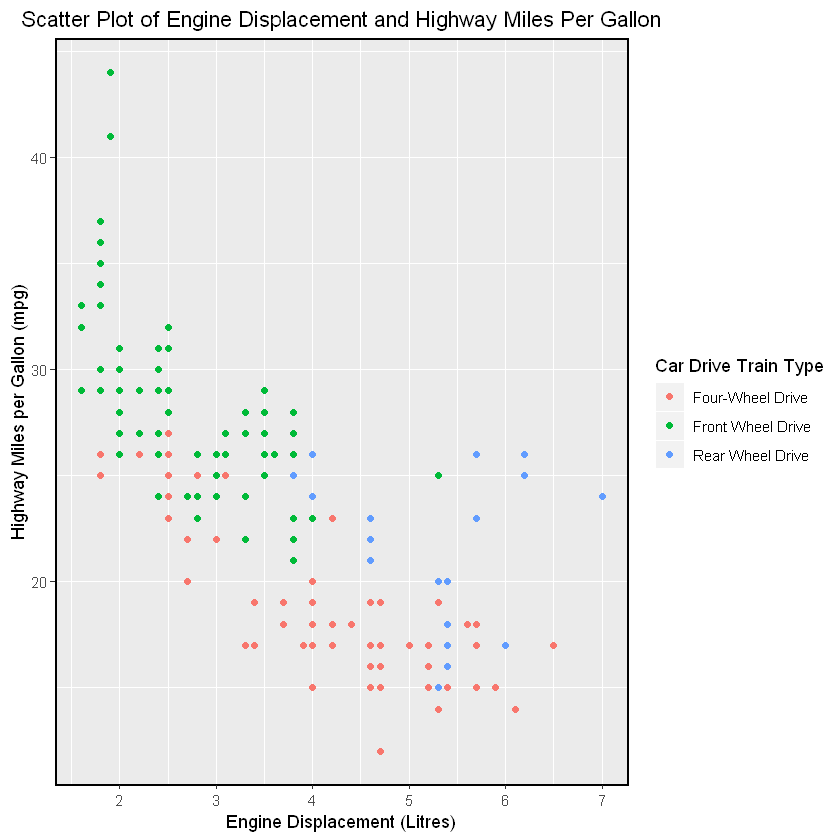

In [117]:
ggplot(data=mpg, mapping=aes(x=displ,y=hwy,color=drv))+ #`color=` is used to color scatter plots while `fill=` is used to fill in boxplots 
  geom_point()+
  labs(x= "Engine Displacement (Litres)", y = "Highway Miles per Gallon (mpg)")+
  ggtitle("Scatter Plot of Engine Displacement and Highway Miles Per Gallon")+
  theme(plot.title = element_text(hjust = 0.5), #putting the ggplot title in the center
       panel.border = element_rect(color = "black", fill = NA, size = 1))+ #creating the graph border
  scale_color_manual(name="Car Drive Train Type",
                    labels=c("Four-Wheel Drive", "Front Wheel Drive", "Rear Wheel Drive"),
                    values=c("#f8766d", "#00ba38", "#619cff"))